<a href="https://colab.research.google.com/github/thamcrlima/dadosEQC/blob/main/eqcviolenciaPERNAMBUCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS DE VIOLÊNCIA NO NORDESTE - EU QUERO CONTAR (EQC)


> Feito por Thamires Lima - ([Linkedin](https://www.linkedin.com/in/thamires-lima-6214b41bb/)). **Faz parte do Time Advocacy da Eu Quero Contar**, é doutoranda em Ciência Política pelo PPGCP-UFPE.

**Objetivo deste projeto**: A EQC é uma ONG ainda muito jovem, e nesse primeiro momento, há a necessidade de focar em uma região territorial. Com essa análise de dados o próposito é construir um mapeamento da violência de gênero no Norte e Nordeste, conseguindo assim dar suporte a escolhas das regiões prioritárias e criar um panorama e áreas focais.

In [ ]:
##Importando pacotes para análise de dados
!pip install pyreadstat
!pip install seaborn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import seaborn as sns
sns.set_theme()



Análise das bases de dados sobre violência de gênero/domésticas.

Estados analisados:


1.   Pernambuco (PE) - Base de dados: SDS-PE Base de dados de Violência Doméstica ([Link](https://www.sds.pe.gov.br/estatisticas/40-estatisticas/178-violencia-domestica-e-familiar-contra-a-mulher)) e de MVIs (Feminicidio) ([LINK]((https://www.sds.pe.gov.br/estatisticas/40-estatisticas/11679-mortes-violentas-intencionais-mvi)))
2.   Alagoas (AL) - SESP - BI de violência contra mulher ([link](https://sesp.es.gov.br/painel-de-violencia-mulher)) - Necessário pedido de Acesso a informação.
3.   Bahia (BA) -SEI - Superintendencia de Estudos Economicos e Sociais da Bahia - achado pela pesquisa google mas site fora do ar - Abrir pedido de Acesso a Informação.
4.   Ceará (CE) - SSPDS ([link](https://www.sspds.ce.gov.br/estatisticas/)) - Há BI's e relatórios de dados - Necessário pedido de acesso a informação.
5.   Maranhão (MA)
6.   Paraíba (PB)
7.   Piauí (PI)
8.   Rio Grande do Norte (RN)
9.   Sergipe (SE)





# PERNAMBUCO

# ANÁLISE DE DADOS COM ESTATÍSTICA DESCRITIVA

Limpeza de dados a partir da base de dados da SDS-PE.

In [ ]:
## Leitura do arquivo EXCEL

arquivo_excel = pd.ExcelFile('MICRODADOS_DE_VIOLÊNCIA_DOMÉSTICA_JAN_2015_A_MAR_2025.xlsx')
print(arquivo_excel.sheet_names)


['Plan1']


In [ ]:
## Chamado do dataframe com o nome PE

pe = arquivo_excel.parse('Plan1')

In [ ]:
## Chamar colunas e primeiros casos dos DF para entender composição das variavéis
print(pe.columns)
print(pe.head())


Index(['MUNICÍPIO DO FATO', 'REGIAO GEOGRÁFICA', 'NATUREZA', 'DATA DO FATO',
       'ANO', 'SEXO', 'IDADE SENASP', 'TOTAL DE ENVOLVIDOS'],
      dtype='object')
       MUNICÍPIO DO FATO REGIAO GEOGRÁFICA  \
0  AFOGADOS DA INGAZEIRA            SERTÃO   
1  AFOGADOS DA INGAZEIRA            SERTÃO   
2                AFRANIO            SERTÃO   
3                AFRANIO            SERTÃO   
4            AGUAS BELAS           AGRESTE   

                                            NATUREZA DATA DO FATO   ANO  \
0  ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...   2015-01-01  2015   
1           INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR   2015-01-01  2015   
2            AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR   2015-01-01  2015   
3    LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR   2015-01-01  2015   
4  ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...   2015-01-01  2015   

       SEXO IDADE SENASP  TOTAL DE ENVOLVIDOS  
0  FEMININO     1) 00-11                    2  
1  FEMININO    

Descrição das variáveis

* 'MUNICÍPIO DO FATO' - *String*
* 'REGIAO GEOGRÁFICA' - *String* - Região metropolitana, Agreste, Sertão, Recife e Zona da Mata
* 'NATUREZA' - *String* - Tipos de Crimes
* 'DATA DO FATO' - *DATA, (Formato AAAA-MM-DD)* Data da ocorrência P.S.: A SDS chama a atenção que as mulheres levam alguns dias para denúnciar os atos e pode haver alguma defasagem dos dados.
* 'ANO'- *DATA*
* 'SEXO' - *String* Sexo da vítima
* 'IDADE SENASP' - *Categorica* A SDS-PE não possue um manual do dataframe ou explicação sobre as variáveis. Não sabemos indicar o que é esta variável, como aparece no dataframe como, por exemplo, 00-11, 35-64, 30-34, e etc, acreditamos que seja a idade da vítima em uma variável categórica. Lembrando que esse banco de dados é aberto e pode ser uma categorização para proteger as vítimas e os seus dados de acordo coma LGPD.
* 'TOTAL DE ENVOLVIDOS' - *Numérica* Novamente não há informação se os envolvidos são vítimas ou perpetuadores do crime.

In [ ]:
## Limpeza da variável NATUREZA por conta da poluição das categorias por conta da poluição visual
## "POR VIOLÊNCIA DOMÉSTICA/FAMILIAR"
pe['NATUREZA'] = pe['NATUREZA'].str.replace(r'POR VIOLÊNCIA DOMÉSTICA/FAMILIAR\s*$', '', regex=True).str.strip()


Inicío da análise descritiva como frequência e gráficos

In [ ]:
## Frequência da coluna Natureza - Análise de quais tipos de crimes são os mais
##comuns

frequencia_reg_pe = pe['REGIAO GEOGRÁFICA'].value_counts()

print("Frequência de Região Geográfica dos Crimes:")
print(frequencia_reg_pe.head(10))


Frequência de Região Geográfica dos Crimes:
REGIAO GEOGRÁFICA
REGIÃO METROPOLITANA    102296
AGRESTE                  87410
SERTÃO                   82624
RECIFE                   58352
ZONA DA MATA             44308
Name: count, dtype: int64


In [ ]:
## Frequência da coluna Natureza - Análise de quais tipos de crimes são os mais
##comuns

frequencia_natureza_pe = pe['NATUREZA'].value_counts()

print("Frequência de Natureza dos Delitos:")
print(frequencia_natureza_pe.head(10))


Frequência de Natureza dos Delitos:
NATUREZA
AMEAÇA                    135095
LESÃO CORPORAL             89154
INJÚRIA                    50869
DANO                       19743
OUTROS CRIMES              19742
VIAS DE FATOS              19375
PERTURBAÇÃO DO SOSSEGO     11557
DIFAMAÇÃO                   9518
MAUS TRATOS                 5133
PERSEGUIÇÃO                 5012
Name: count, dtype: int64


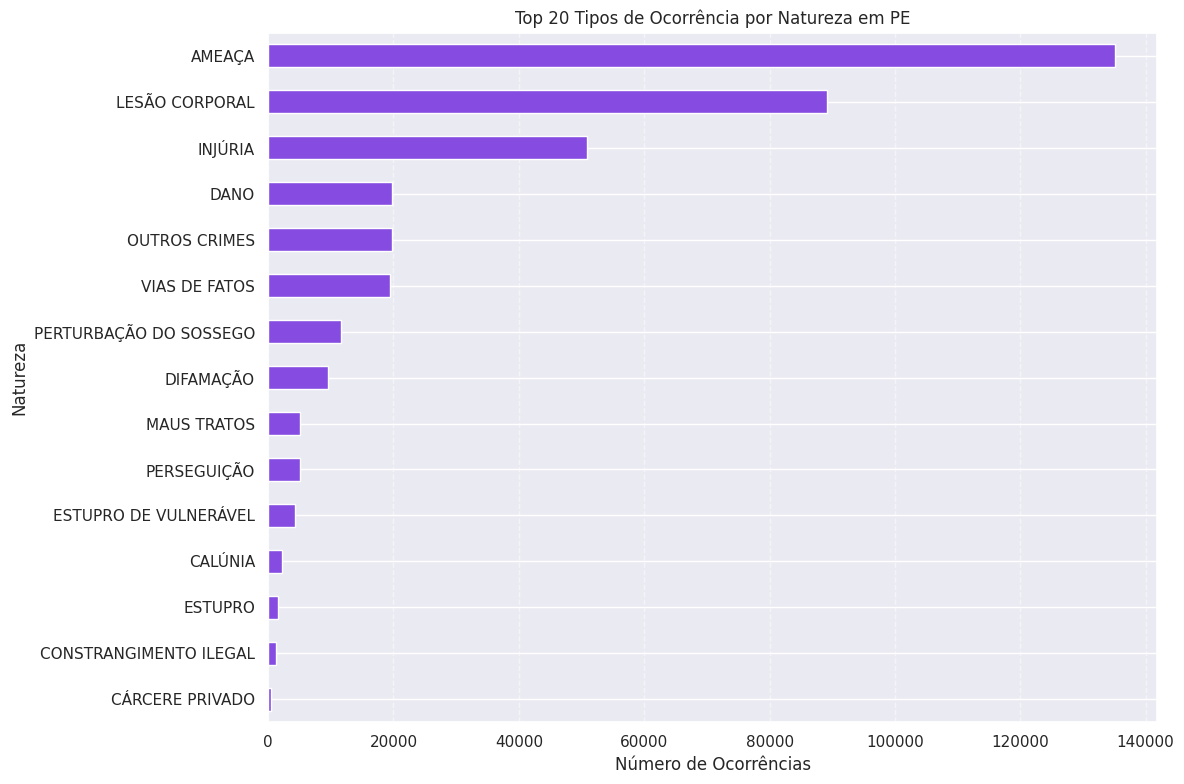

In [ ]:
##Gráfico da frequência absoluta dos tipos de crimes para visualização das discrepâncias entre tipos

import matplotlib.pyplot as plt

## Limpar colunas
pe.columns = pe.columns.str.strip()

## Conta de frequência das variáveis
frequencia_natureza_pe = pe['NATUREZA'].value_counts()

## código para plotação de gráfico
frequencia_natureza_pe.head(20).plot(kind='barh', figsize=(12, 8), color='#864ce2')

plt.title('Top 20 Tipos de Ocorrência por Natureza em PE')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Natureza')
plt.gca().invert_yaxis()  ## Coloca o mais frequente no topo
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Aqui temos alguns insights:


1.   Ameaça e Lesão corporal como os tipos com maior frequência.
2.   Os outros tipos de violência podem ser entendidos como 'violência' menor e as vítimas podem relutar em denunciar até ocorrer a escaladda de violência.
3.   Chama a atenção também o número baixo de violência sexual (estupro) e estupro de vúlneravel - provavelmente pela não denúncia das mulheres.
4.   Checar outras databases da SDS-PE devido a ausência dos casos de femínicidio nesta df. - Database de mortes intencionais [SDS-PE](https://www.sds.pe.gov.br/estatisticas/40-estatisticas/11679-mortes-violentas-intencionais-mvi)



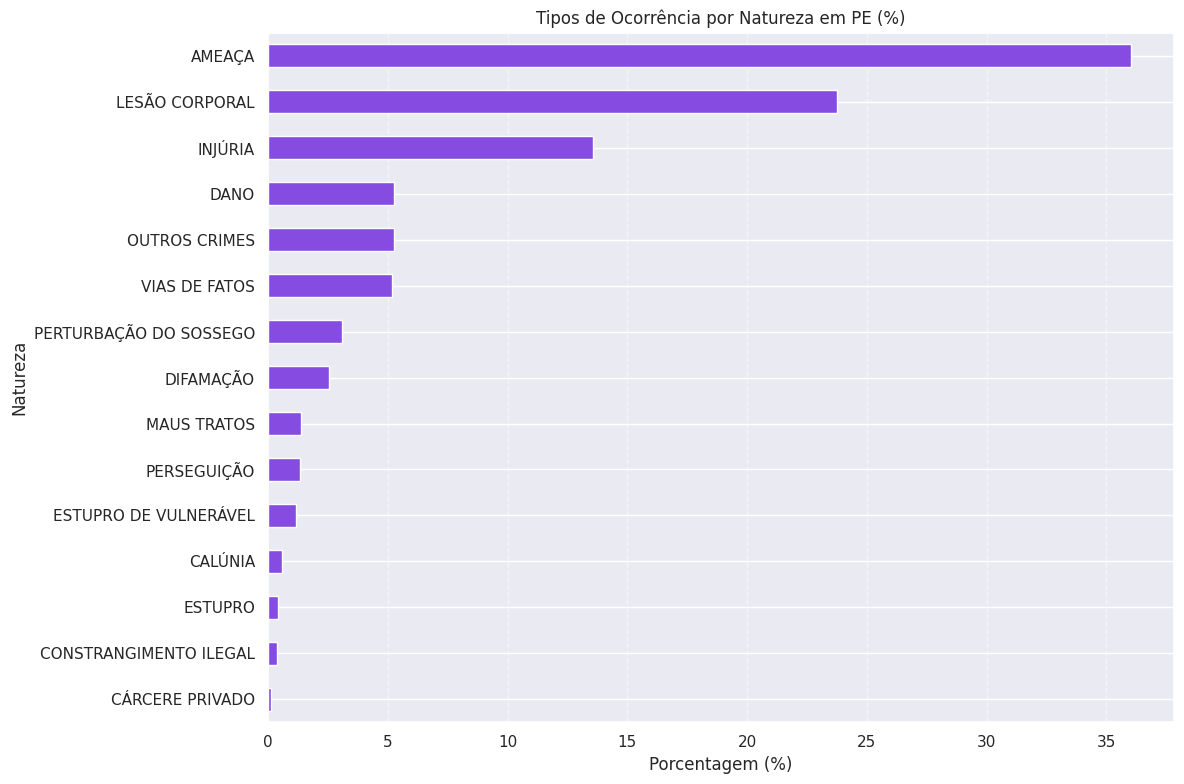

In [ ]:
## Criação do gráfico de tipos mas com porcentagens
import matplotlib.pyplot as plt
pe.columns = pe.columns.str.strip()

## Calcula a porcentagem de cada tipo de ocorrência
porcentagem_natureza_pe = pe['NATUREZA'].value_counts(normalize=True) * 100

## Gráfico
porcentagem_natureza_pe.head(20).plot(kind='barh', figsize=(12, 8), color='#864ce2') ##Necessário o número para incluir todos os tipos e não apenas o mais frequentes

plt.title('Tipos de Ocorrência por Natureza em PE (%)')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Natureza')
plt.gca().invert_yaxis()  # Coloca o mais frequente no topo
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
## Criação de uma média anual entre os tipos de crimes
pe.columns = pe.columns.str.strip()

## Extração do ano para criar a variavél de ano
if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

contagem_anual = pe.groupby(['ANO', 'NATUREZA']).size().reset_index(name='FREQUENCIA')

## Calculo de média anual para tipos
media_por_natureza = contagem_anual.groupby('NATUREZA')['FREQUENCIA'].mean().sort_values(ascending=False)
print(media_por_natureza)


NATUREZA
AMEAÇA                    12281.363636
LESÃO CORPORAL             8104.909091
INJÚRIA                    4624.454545
DANO                       1794.818182
OUTROS CRIMES              1794.727273
VIAS DE FATOS              1761.363636
PERTURBAÇÃO DO SOSSEGO     1050.636364
DIFAMAÇÃO                   865.272727
PERSEGUIÇÃO                 716.000000
MAUS TRATOS                 466.636364
ESTUPRO DE VULNERÁVEL       395.454545
CALÚNIA                     195.000000
ESTUPRO                     136.181818
CONSTRANGIMENTO ILEGAL      121.363636
CÁRCERE PRIVADO              58.000000
Name: FREQUENCIA, dtype: float64


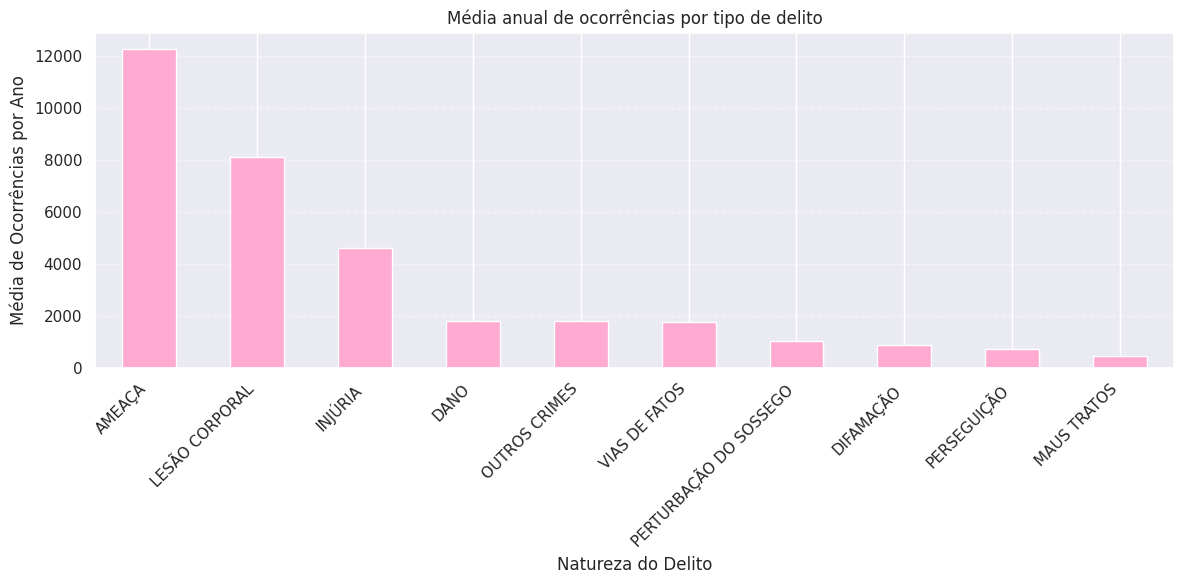

In [ ]:
## Plotando o top 10 a partir da média
media_por_natureza.head(10).plot(kind='bar', figsize=(12,6), color='#ffaad0')
plt.title('Média anual de ocorrências por tipo de delito')
plt.xlabel('Natureza do Delito')
plt.ylabel('Média de Ocorrências por Ano')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


ANO
2015    10201
2016    10256
2017    10417
2018    12624
2019    13547
2020    13253
2021    13544
2022    14131
2023    16277
2024    16624
2025     4221
Name: count, dtype: int64


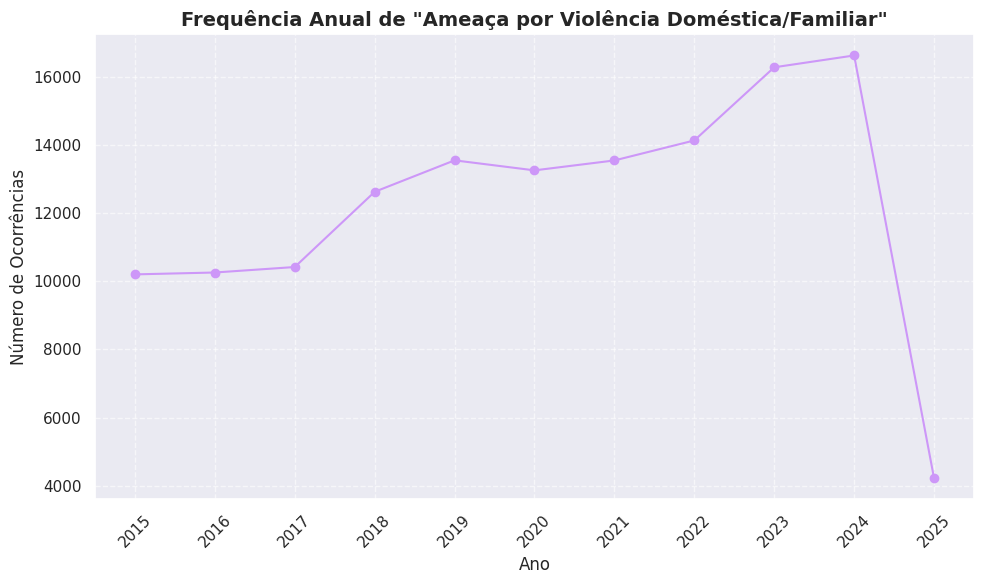

In [ ]:

## Instalção para o gráfcio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Limpar coluna
pe.columns = pe.columns.str.strip()

## Variável ano para criação do gráfico
if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

## Uso dos tipos de crimes
violencia_domestica = pe[pe['NATUREZA'] == 'AMEAÇA']
print(violencia_domestica['ANO'].value_counts().sort_index())

## Criação da variável da frequência por ano para o gráfico
frequencia_por_ano = violencia_domestica.groupby('ANO').size()

## Gráfico com frequência
if not frequencia_por_ano.empty:
    frequencia_por_ano.plot(kind='line', marker='o', figsize=(10, 6), color='#cd97f8')
    plt.title('Frequência Anual de "Ameaça por Violência Doméstica/Familiar"', fontsize=14, weight='bold')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(frequencia_por_ano.index, rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum dado encontrado com a natureza 'AMEAÇA'.")


Podemos ver uma queda no ano de 2025 - porém, os dados foram coletados em 22/04/2025. Como os dados são coletados mensalmente pela SDS, o ano de 2025 apenas apresenta os crimes denunciados até o mês de **março** do mesmo ano.

Assim, a incoscistência de 2025 par aos outros anos é que em 2025 há só 3 meses dados, enquanto os outros anos possuem 12.

ANO
2015    10201
2016    10256
2017    10417
2018    12624
2019    13547
2020    13253
2021    13544
2022    14131
2023    16277
2024    16624
Name: count, dtype: int64


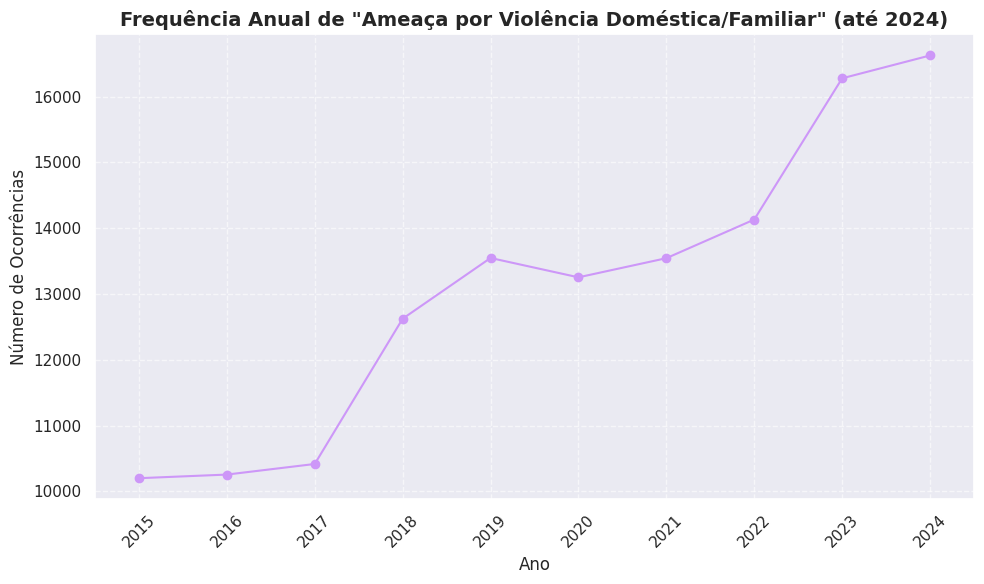

In [ ]:
## Instalação para o gráfico
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Limpar coluna
pe.columns = pe.columns.str.strip()

## Variável ano para criação do gráfico
if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

## Uso dos tipos de crimes - filtrando também anos válidos
violencia_domestica = pe[(pe['NATUREZA'] == 'AMEAÇA') & (pe['ANO'] < 2025)]  # Filtro adicionado aqui
print(violencia_domestica['ANO'].value_counts().sort_index())

## Criação da variável da frequência por ano para o gráfico
frequencia_por_ano = violencia_domestica.groupby('ANO').size()

## Gráfico com frequência
if not frequencia_por_ano.empty:
    plt.figure(figsize=(10, 6))
    frequencia_por_ano.plot(kind='line', marker='o', color='#cd97f8')

    plt.title('Frequência Anual de "Ameaça por Violência Doméstica/Familiar" (até 2024)',
              fontsize=14, weight='bold')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Ajustando os ticks para mostrar todos os anos
    plt.xticks(frequencia_por_ano.index, rotation=45)

    # Melhorando os limites do eixo X
    plt.xlim(frequencia_por_ano.index.min() - 0.5, frequencia_por_ano.index.max() + 0.5)

    plt.tight_layout()
    plt.show()
else:
    print("Nenhum dado encontrado com a natureza 'AMEAÇA' antes de 2025.")

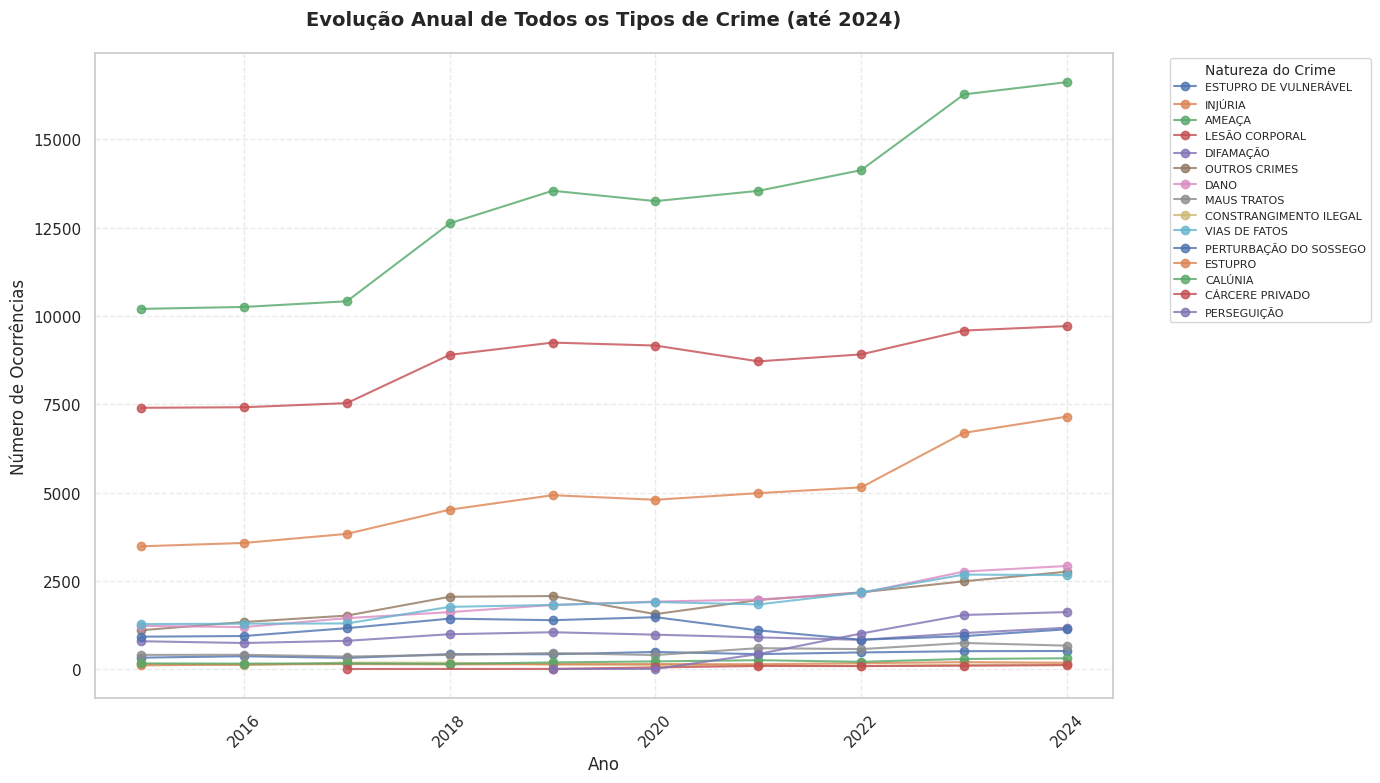


Tabela Resumo (Top 10 categorias por volume total):
NATUREZA
AMEAÇA                    130874
LESÃO CORPORAL             86581
INJÚRIA                    49074
DANO                       18991
OUTROS CRIMES              18981
VIAS DE FATOS              18654
PERTURBAÇÃO DO SOSSEGO     11269
DIFAMAÇÃO                   9236
MAUS TRATOS                 4960
PERSEGUIÇÃO                 4578
Name: count, dtype: int64


In [ ]:
##Criação do gráfico da evolução dos tipos de caso anualmente

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Configuração do estilo
try:
    sns.set_style("whitegrid")
    palette = "viridis"
except:
    palette = "tab20"

## Limpeza da coluna
pe.columns = pe.columns.str.strip()

if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

## Exclusão do ano de 2025 devido a ausência de dados - apresenta só o primeiro trimestre
dados = pe[pe['ANO'] < 2025]

##verificação de dados e plot do gráfico
if dados.empty:
    print("Nenhum dado disponível antes de 2025.")
else:
    plt.figure(figsize=(14, 8))

    for natureza in dados['NATUREZA'].unique():
        dados_natureza = dados[dados['NATUREZA'] == natureza]
        contagem = dados_natureza.groupby('ANO').size()
        plt.plot(contagem.index, contagem.values,
                marker='o', linestyle='-',
                label=natureza, alpha=0.8)

##INCLUSÃO DO TITULO, E FORMATAÇÃO DO EIXO X E Y
    plt.title('Evolução Anual de Todos os Tipos de Crime (até 2024)',
             fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)

##Criação da legenda
    plt.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              title='Natureza do Crime',
              title_fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##Tabela de resumo com total de dados
    print("\nTabela Resumo (Top 10 categorias por volume total):")
    total_por_natureza = dados['NATUREZA'].value_counts().head(10)
    print(total_por_natureza)

In [ ]:
## Formatação do data do fato em datetime
if 'DATA DO FATO' in pe.columns:
    pe['DATA DO FATO'] = pd.to_datetime(pe['DATA DO FATO'], errors='coerce')
else:
    raise KeyError("Coluna 'DATA DO FATO' não encontrada no DataFrame.")

## Filtrando dados validos
dados_validos = pe.dropna(subset=['DATA DO FATO', 'NATUREZA']).copy()
dados_validos['NATUREZA'] = dados_validos['NATUREZA'].str.strip().str.upper()

## Agrupando ocorrênciaas por dia
ocorrencias_por_dia = dados_validos.groupby(['DATA DO FATO', 'NATUREZA']).size().reset_index(name='ocorrencias')

## Calculando média
media_diaria = ocorrencias_por_dia.groupby('NATUREZA')['ocorrencias'].mean().sort_values(ascending=False)

print("Média diária de ocorrências por tipo de crime (Top 15):")
print(media_diaria.head(15).round(2))


Média diária de ocorrências por tipo de crime (Top 15):
NATUREZA
AMEAÇA                    36.09
LESÃO CORPORAL            23.82
INJÚRIA                   13.59
DANO                       5.39
OUTROS CRIMES              5.36
VIAS DE FATOS              5.27
PERSEGUIÇÃO                3.75
PERTURBAÇÃO DO SOSSEGO     3.32
DIFAMAÇÃO                  2.80
MAUS TRATOS                2.00
ESTUPRO DE VULNERÁVEL      1.75
CALÚNIA                    1.36
ESTUPRO                    1.25
CONSTRANGIMENTO ILEGAL     1.23
CÁRCERE PRIVADO            1.17
Name: ocorrencias, dtype: float64


In [ ]:
## Formatação do data do fato em datetime
pe['DATA DO FATO'] = pd.to_datetime(pe['DATA DO FATO'], errors='coerce')

## Criando coluna de ano
pe['ANO'] = pe['DATA DO FATO'].dt.year

## Limpando coluna
pe['NATUREZA'] = pe['NATUREZA'].str.strip().str.upper()

## Filtrando NA
dados_validos = pe.dropna(subset=['DATA DO FATO', 'NATUREZA', 'ANO']).copy()

## dias do ano
dias_por_ano = dados_validos.groupby('ANO')['DATA DO FATO'].nunique()

##Ocorrência ano / natureza
ocorrencias_totais = dados_validos.groupby(['ANO', 'NATUREZA']).size().reset_index(name='total_ocorrencias')

## média por ano
ocorrencias_totais['media_diaria'] = ocorrencias_totais.apply(
    lambda row: row['total_ocorrencias'] / dias_por_ano[row['ANO']],
    axis=1
)

print("Média diária por tipo de crime e por ano (Top 10 por média):")
top_medias = ocorrencias_totais.sort_values(['ANO', 'media_diaria'], ascending=[True, False])
print(top_medias.groupby('ANO').head(10).round(2))


Média diária por tipo de crime e por ano (Top 10 por média):
      ANO                NATUREZA  total_ocorrencias  media_diaria
0    2015                  AMEAÇA              10201         27.95
8    2015          LESÃO CORPORAL               7399         20.27
7    2015                 INJÚRIA               3476          9.52
12   2015           VIAS DE FATOS               1272          3.48
3    2015                    DANO               1224          3.35
..    ...                     ...                ...           ...
157  2025           VIAS DE FATOS                721          8.01
155  2025             PERSEGUIÇÃO                434          4.82
156  2025  PERTURBAÇÃO DO SOSSEGO                288          3.20
148  2025               DIFAMAÇÃO                282          3.13
153  2025             MAUS TRATOS                173          1.92

[110 rows x 4 columns]


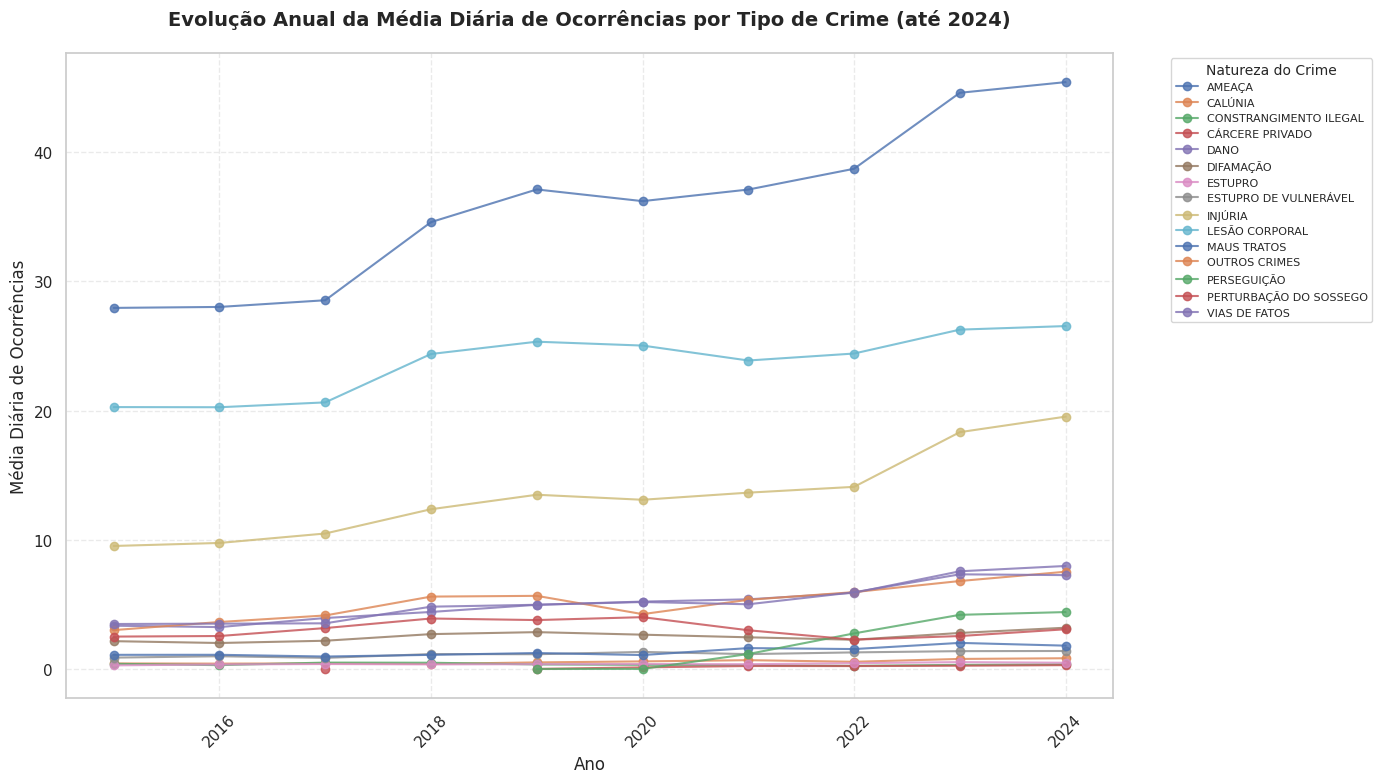


Tabela Resumo - Média diária por tipo de crime (Top 10 totais):
NATUREZA
AMEAÇA                    35.83
LESÃO CORPORAL            23.70
INJÚRIA                   13.43
DANO                       5.20
OUTROS CRIMES              5.20
VIAS DE FATOS              5.11
PERTURBAÇÃO DO SOSSEGO     3.08
DIFAMAÇÃO                  2.53
PERSEGUIÇÃO                2.09
MAUS TRATOS                1.36
Name: media_diaria, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Estilo visual do gráfico
try:
    sns.set_style("whitegrid")
    palette = "viridis"
except:
    palette = "tab20"

pe.columns = pe.columns.str.strip()

##ano em datetime
pe['DATA DO FATO'] = pd.to_datetime(pe['DATA DO FATO'], errors='coerce')
pe['ANO'] = pe['DATA DO FATO'].dt.year
pe['NATUREZA'] = pe['NATUREZA'].str.strip().str.upper()

## dropando 2025 por ser um ano incompleto
dados = pe[pe['ANO'] < 2025].dropna(subset=['DATA DO FATO', 'NATUREZA'])

## verificando daods
if dados.empty:
    print("Nenhum dado disponível antes de 2025.")
else:

    dias_por_ano = dados.groupby('ANO')['DATA DO FATO'].nunique()


    ocorrencias_totais = dados.groupby(['ANO', 'NATUREZA']).size().reset_index(name='total_ocorrencias')

    ## calculando média diária
    ocorrencias_totais['media_diaria'] = ocorrencias_totais.apply(
        lambda row: row['total_ocorrencias'] / dias_por_ano[row['ANO']],
        axis=1
    )

    ## pivotando eixos
    media_pivot = ocorrencias_totais.pivot(index='ANO', columns='NATUREZA', values='media_diaria')

    ## gráfico
    plt.figure(figsize=(14, 8))
    for natureza in media_pivot.columns:
        plt.plot(media_pivot.index, media_pivot[natureza], marker='o', linestyle='-', label=natureza, alpha=0.8)

    ##formatação
    plt.title('Evolução Anual da Média Diária de Ocorrências por Tipo de Crime (até 2024)',
              fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Média Diária de Ocorrências', fontsize=12)

    ##legenda
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8,
               title='Natureza do Crime', title_fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    ##tabela resumo
    print("\nTabela Resumo - Média diária por tipo de crime (Top 10 totais):")
    media_total = ocorrencias_totais.groupby('NATUREZA')['media_diaria'].mean().sort_values(ascending=False)
    print(media_total.head(10).round(2))


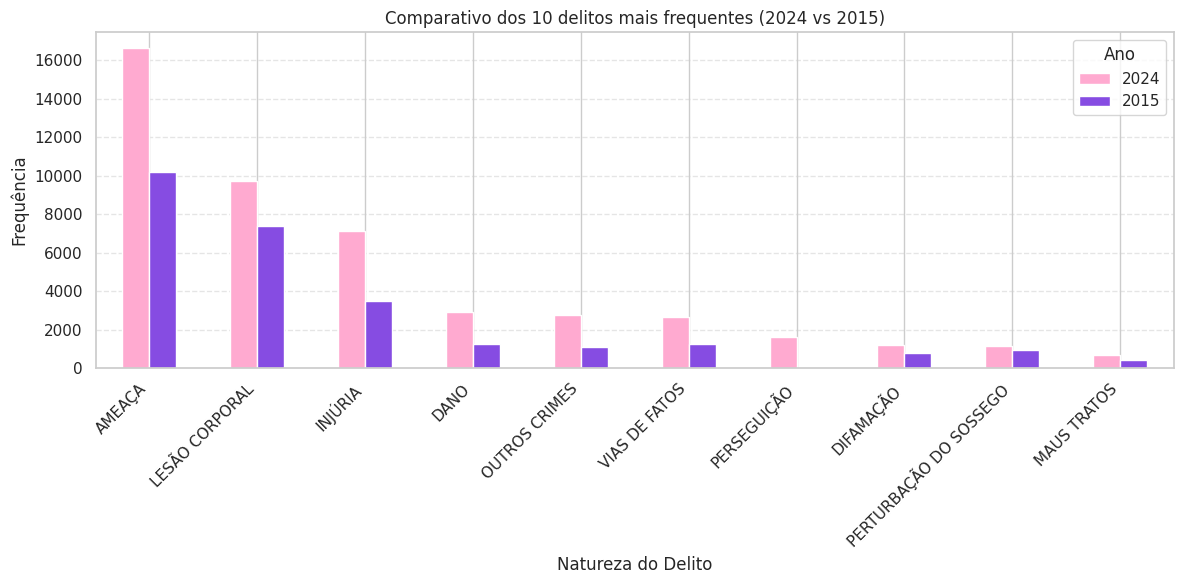

In [ ]:
import matplotlib.pyplot as plt


pe.columns = pe.columns.str.strip()

## data p datetime
if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

## limpando coluna e tirando poluição das categorias
pe['NATUREZA'] = pe['NATUREZA'].str.strip().str.upper()
pe['NATUREZA'] = pe['NATUREZA'].str.replace(r'\s*POR VIOLÊNCIA DOMÉSTICA/FAMILIAR\s*$', '', regex=True)

## filtro de anos
dados_2024 = pe[pe['ANO'] == 2024]
dados_2015 = pe[pe['ANO'] == 2015]

## frequência natureza por anos
frequencia_2024 = dados_2024['NATUREZA'].value_counts()
frequencia_2015 = dados_2015['NATUREZA'].value_counts()

## mais frequentes de 2024
top10_2024 = frequencia_2024.head(10)

## df para comparação
comparativo = pd.DataFrame({
    '2024': top10_2024,
    '2015': frequencia_2015.reindex(top10_2024.index).fillna(0).astype(int)
})

## plot do gráfico
comparativo.plot(kind='bar', figsize=(12, 6), color=['#ffaad0', '#864ce2'])
plt.title('Comparativo dos 10 delitos mais frequentes (2024 vs 2015)')
plt.xlabel('Natureza do Delito')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Ano')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Já na comparação entre 2015 e 2024 vemos um grande crescente de casos - mesmo sabendo da existência de baixa denúncias/subnotificação. Isso ocorre pelo estigma ocasionado pela violência de gênero e até mesmo a naturalização dos atos.

Muitas vezes as mulheres não denúnciam no primeiro sinal de agressão.

Pesquisa nacional indica que apenas 60% dos casos de violência não são denunciado - [link](https://www1.folha.uol.com.br/folha-social-mais/2023/11/60-das-mulheres-nao-denunciam-violencia-sofrida-a-policia.shtml).



---

A criação de um gráfico interativo com menu dropdown. Solução fácil para não criar comparativos de todos os anos possíveis e mesmo assim poussuir a informação a mão. Assim não se poluí possíveis relatórios de dados e a informação fica disponível caso queira comparar anos específicos e não apenas o começo e fim da série temporal.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown


try:
    if not isinstance(pe, pd.DataFrame):
        raise NameError("DataFrame 'pe' não encontrado")


    pe.columns = pe.columns.str.strip()

    if 'DATA' in pe.columns:
        pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
        pe['ANO'] = pe['DATA'].dt.year

    pe['NATUREZA'] = pe['NATUREZA'].str.strip().str.upper()
    pe['NATUREZA'] = pe['NATUREZA'].str.replace(r'\s*POR VIOLÊNCIA DOMÉSTICA/FAMILIAR\s*$', '', regex=True)

    #anos da análise + drop na
    anos_disponiveis = sorted(pe['ANO'].dropna().unique())

    ## gráfico comparando os anos
    def plot_comparativo_interativo(ano_base, ano_comparacao, top_n=10):
        ## criação do ano base e ano de comparação
        dados_base = pe[pe['ANO'] == ano_base]
        dados_comp = pe[pe['ANO'] == ano_comparacao]

        ## frequência dos casos
        freq_base = dados_base['NATUREZA'].value_counts().head(top_n)
        freq_comp = dados_comp['NATUREZA'].value_counts()

        ## df comparativo
        df_comparativo = pd.DataFrame({
            str(ano_base): freq_base,
            str(ano_comparacao): freq_comp.reindex(freq_base.index).fillna(0).astype(int)
        })

        ## aumentar o gráfico
        plt.subplots_adjust(bottom=0.3, left=0.1, right=0.95, top=0.9)

        ax = df_comparativo.plot(kind='bar', figsize=(18, 12), color=['#ffaad0', '#864ce2'])

        plt.title(f'Comparativo dos {top_n} delitos mais frequentes\n{ano_base} vs {ano_comparacao}', fontsize=14, pad=20)
        plt.xlabel('Natureza do Delito', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.xticks(rotation=50, ha='right', fontsize=14)
        plt.yticks(fontsize=10)
        plt.legend(title='Ano', title_fontsize='14', fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.grid(axis='y', linestyle=':', alpha=0.3)
        ax.set_axisbelow(True)
        for patch in ax.patches:
            patch.set_width(0.35)
            patch.set_edgecolor('white')

        plt.tight_layout()
        plt.show()

    ## dropdown menu para escolha dos anos
    interact(
        plot_comparativo_interativo,
        ano_base=Dropdown(options=anos_disponiveis, value=anos_disponiveis[0], description='Ano Base:'),
        ano_comparacao=Dropdown(options=anos_disponiveis, value=anos_disponiveis[-1], description='Ano de Comparação:')
    )

except NameError as e:
    print(e)


interactive(children=(Dropdown(description='Ano Base:', options=(np.int64(2015), np.int64(2016), np.int64(2017…

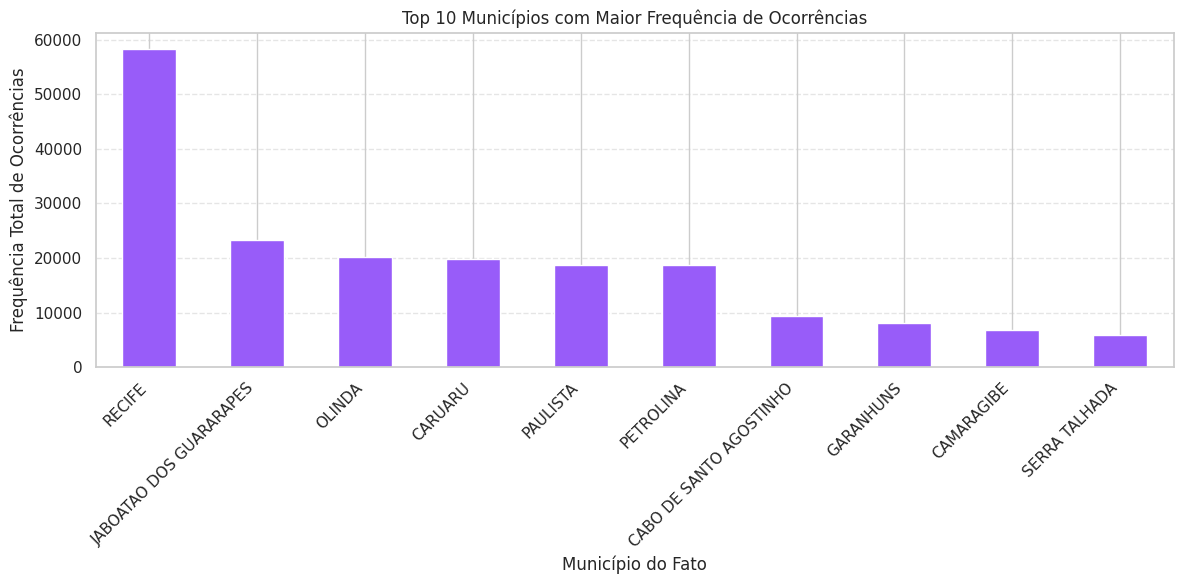

In [ ]:
import matplotlib.pyplot as plt

pe.columns = pe.columns.str.strip().str.upper()  # transforma para maiúsculas

## Dropar casos sem data de municipio
pe = pe.dropna(subset=['MUNICÍPIO DO FATO'])

## frequencia por municipio
frequencia_por_municipio = pe['MUNICÍPIO DO FATO'].value_counts().sort_values(ascending=False)

## top 10 municipios
top_n = 10
frequencia_por_municipio.head(top_n).plot(kind='bar', figsize=(12, 6), color='#985cf9')

## gráfico
plt.title(f'Top {top_n} Municípios com Maior Frequência de Ocorrências')
plt.xlabel('Município do Fato')
plt.ylabel('Frequência Total de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


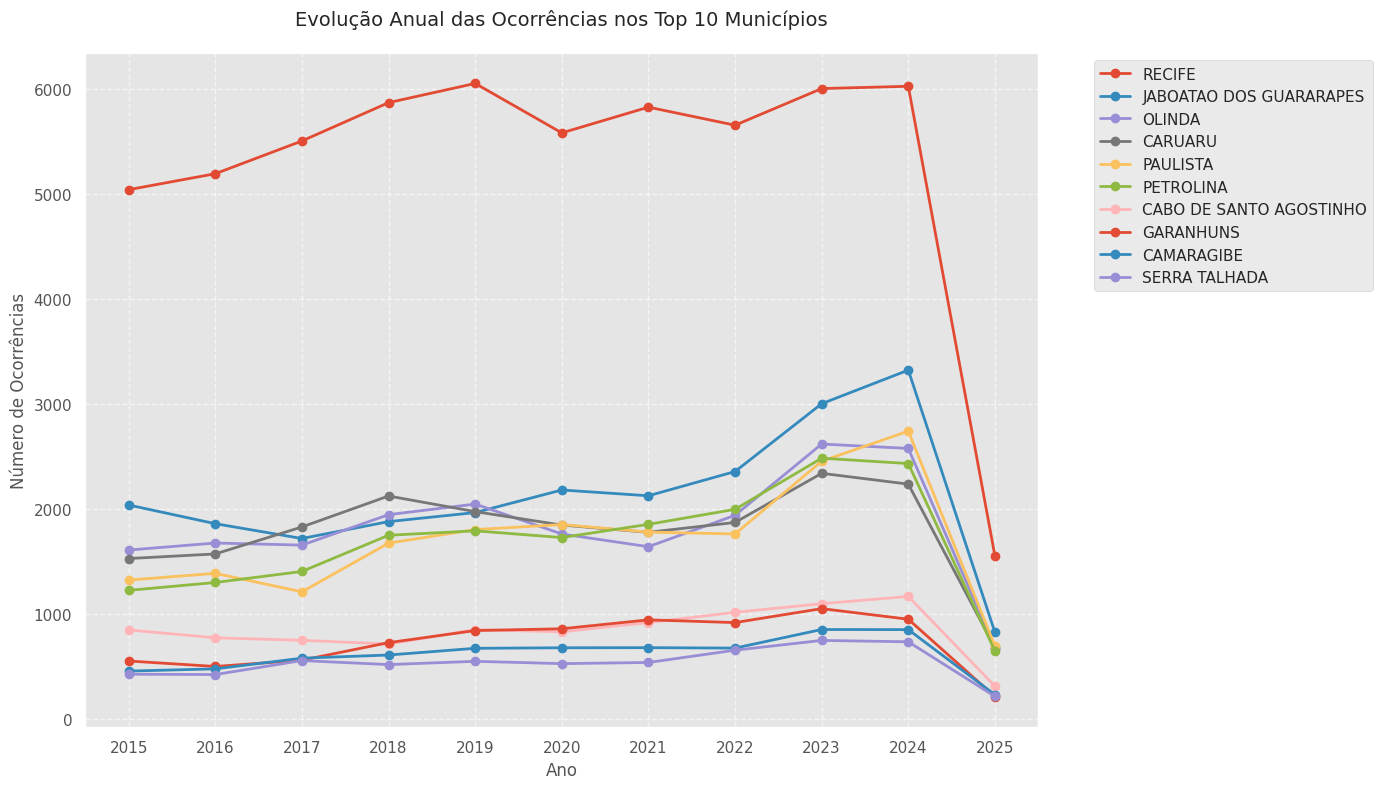

In [ ]:
## retirada de dados do ano de 2025
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
top_n = 10

pe.columns = pe.columns.str.strip()


if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year


if 'MUNICÍPIO DO FATO' not in pe.columns:
    possible_names = [col for col in pe.columns if 'MUNICIPIO' in col.upper()]
    if possible_names:
        pe = pe.rename(columns={possible_names[0]: 'MUNICÍPIO DO FATO'})
    else:
        raise KeyError("Coluna 'MUNICÍPIO DO FATO' não encontrada.")

##drop na
pe = pe.dropna(subset=['ANO', 'MUNICÍPIO DO FATO'])

ocorrencias_por_municipio_ano = pe.groupby(['ANO', 'MUNICÍPIO DO FATO']).size().reset_index(name='OCORRENCIAS')

media_geral_por_municipio = ocorrencias_por_municipio_ano.groupby('MUNICÍPIO DO FATO')['OCORRENCIAS'].mean()
top_municipios = media_geral_por_municipio.nlargest(top_n).index.tolist()

dados_top = ocorrencias_por_municipio_ano[
    ocorrencias_por_municipio_ano['MUNICÍPIO DO FATO'].isin(top_municipios)
]

plt.figure(figsize=(14, 8))

for municipio in top_municipios:
    dados_municipio = dados_top[dados_top['MUNICÍPIO DO FATO'] == municipio]
    plt.plot(dados_municipio['ANO'], dados_municipio['OCORRENCIAS'],
             marker='o', label=municipio, linewidth=2)

plt.title(f'Evolução Anual das Ocorrências nos Top {top_n} Municípios', fontsize=14, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(dados_top['ANO'].unique())  # Mostra todos os anos no eixo X
plt.tight_layout()


plt.show()

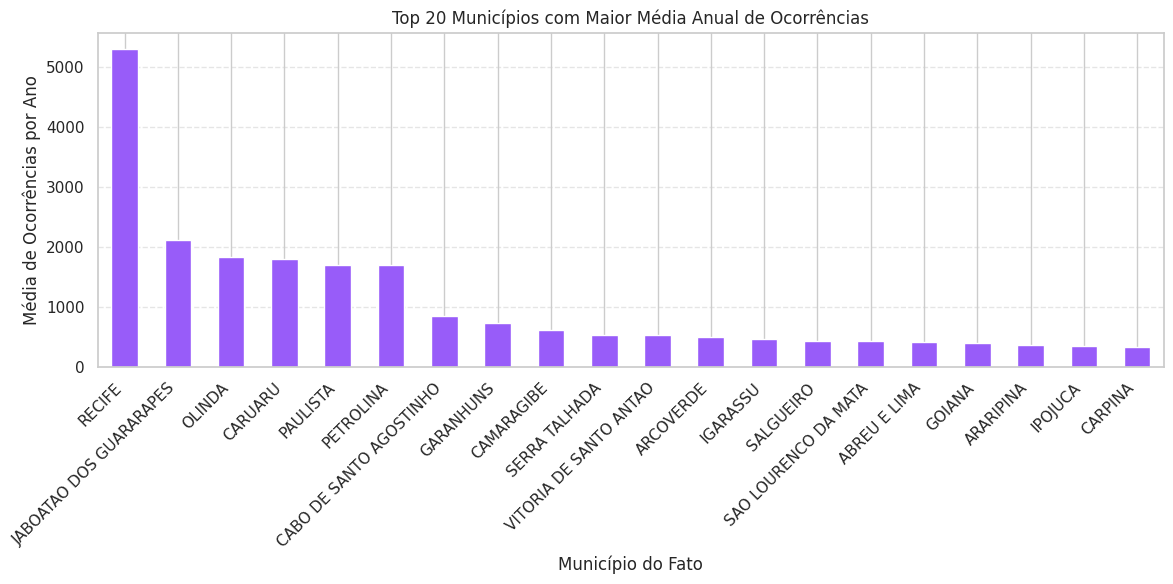

In [ ]:
## Criação de gráfico para entender os municípos
pe.columns = pe.columns.str.strip()

if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

## Check if the column exists with the correct name (case-sensitive)
if 'MUNICÍPIO DO FATO' not in pe.columns:
    # If not found, try finding a similar column name
    possible_names = [col for col in pe.columns if 'MUNICIPIO' in col.upper()]
    if possible_names:
        # Rename to the expected name
        pe = pe.rename(columns={possible_names[0]: 'MUNICÍPIO DO FATO'})
    else:
        raise KeyError("Column 'MUNICÍPIO DO FATO' or similar not found in DataFrame.")


## Remoção de casos sem ano ou sem município indicado/NAs
pe = pe.dropna(subset=['ANO', 'MUNICÍPIO DO FATO'])

## Cálcular frequência anual e média anual por municípioc
ocorrencias_por_municipio_ano = pe.groupby(['ANO', 'MUNICÍPIO DO FATO']).size().reset_index(name='FREQUENCIA')
media_por_municipio = ocorrencias_por_municipio_ano.groupby('MUNICÍPIO DO FATO')['FREQUENCIA'].mean().sort_values(ascending=False)

## Gráfico com os 10 munícipios com maior frequência
top_n = 20
media_por_municipio.head(top_n).plot(kind='bar', figsize=(12, 6), color='#985cf9')

plt.title(f'Top {top_n} Municípios com Maior Média Anual de Ocorrências')
plt.xlabel('Município do Fato')
plt.ylabel('Média de Ocorrências por Ano')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

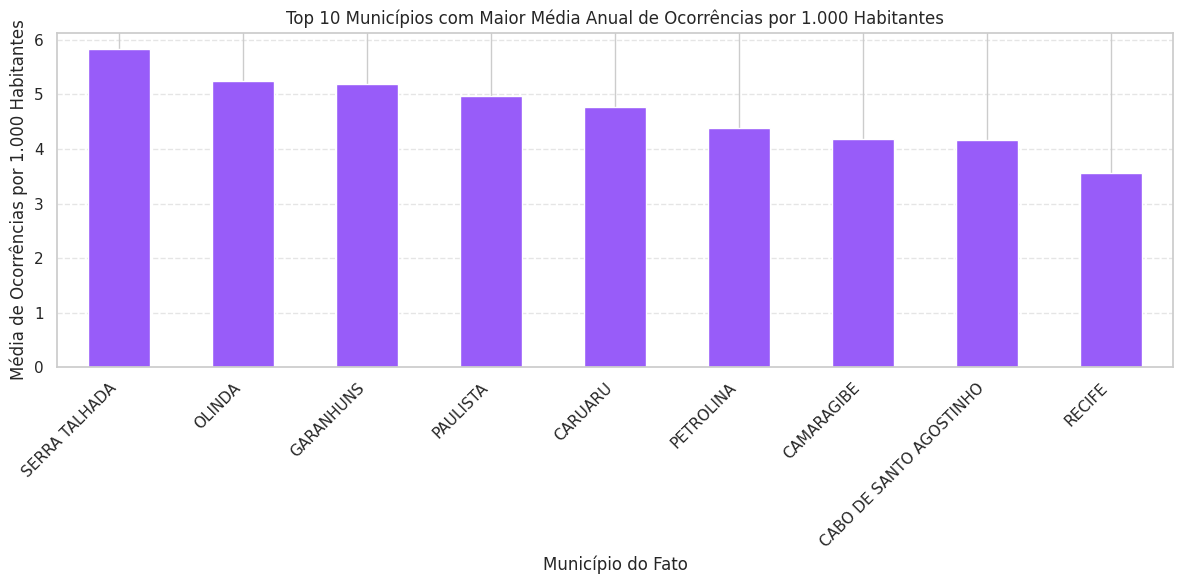

In [ ]:
## Gráfico com frequência por mil habitantes
pe.columns = pe.columns.str.strip()

##Exibe os valores únicos da coluna "MUNICÍPIO DO FATO" para análise
##print("Valores únicos de MUNICÍPIO DO FATO:")
##print(pe['MUNICÍPIO DO FATO'].unique())

## Limpeza de NAs
pe = pe.dropna(subset=['MUNICÍPIO DO FATO'])

## Código para normalização de coluna caso haja discrpância entre maiúsculas minúsculas ou espaços
pe['MUNICÍPIO DO FATO'] = pe['MUNICÍPIO DO FATO'].str.strip().str.upper()

#Exibe novamente os valores únicos após a normalização
#print("Valores únicos após normalização de MUNICÍPIO DO FATO:")
#print(pe['MUNICÍPIO DO FATO'].unique())

## Extração do ano
if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

## Remoção de NA ano
pe = pe.dropna(subset=['ANO'])

## Ocorrência por ano em cada munícipio (frequência)
ocorrencias_por_municipio_ano = pe.groupby(['ANO', 'MUNICÍPIO DO FATO']).size().reset_index(name='FREQUENCIA')

## Média anual de cada municipio
media_por_municipio = ocorrencias_por_municipio_ano.groupby('MUNICÍPIO DO FATO')['FREQUENCIA'].mean()

## Dados de população dos municipios do top 10 de ocorrência - poderiamos usar uma outra database e fazer cross entre os dfs
populacao_municipios = {
    'RECIFE': 1488920,
    'JABOATÃO DOS GUARARAPES': 644037,
    'OLINDA': 349976,
    'CARUARU': 378048,
    'PAULISTA': 342167,
    'PETROLINA': 386791,
    'CABO DE SANTO AGOSTINHO': 203440,
    'GARANHUNS': 142506,
    'CAMARAGIBE': 147771,
    'SERRA TALHADA': 92228
}

## Verificar se todos os municípios possuem dados
municipios_validos = media_por_municipio.index.intersection(populacao_municipios.keys())
##print(f"Municípios com dados válidos: {municipios_validos}")

## Calcular a média anual por 1.000 habitantes
media_por_municipio_por_mil = media_por_municipio[municipios_validos] / pd.Series(populacao_municipios).loc[municipios_validos] * 1000

## Ordena e seleciona os top 10 municípios
top_10_municipios = media_por_municipio_por_mil.sort_values(ascending=False).head(10)

## Verifica se há dados válidos após o cálculo
###print(top_10_municipios)

## Plota o gráfico de barras
if not top_10_municipios.empty:
    top_10_municipios.plot(kind='bar', figsize=(12, 6), color='#985cf9')
    plt.title('Top 10 Municípios com Maior Média Anual de Ocorrências por 1.000 Habitantes')
    plt.xlabel('Município do Fato')
    plt.ylabel('Média de Ocorrências por 1.000 Habitantes')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados suficientes para plotar o gráfico.")


Aqui podemos chegar a conclusão que é necessário atividades focadas na cidade do Recife, ocasionada pela grande ocorrência de casos, mas também é necessário ampliar a rede de apoio a vítimas para a Zona da Mata e Sertão.

Serra Talhada, por exemplo, tem níveis de violência desproporcional para o seu número de habitantes.

---



In [ ]:
import pandas as pd
import requests

## API IBGE
url = "https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv"
df = pd.read_csv(url)

## Filtro dos municipios de pernqambuco
pe_coords = df[df['codigo_uf'] == 26][['codigo_ibge', 'nome', 'latitude', 'longitude']]
pe_coords.columns = ['codigo_ibge', 'municipio', 'latitude', 'longitude']

pe_coords.to_csv('coordenadas_municipios_pe.csv', index=False, encoding='utf-8-sig')
print(f"Dados de {len(pe_coords)} municípios salvos com sucesso!")

Dados de 185 municípios salvos com sucesso!


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import branca.colormap as cm

## selecionando apenas casos de ameaça
ameacas = pe[pe['NATUREZA'].str.contains('AMEAÇA', case=False, na=False)].copy()
print(f"Total de casos de AMEAÇA encontrados: {len(ameacas)}")

## criando verificação
if len(ameacas) > 0:
    print("\nAmostra dos casos de AMEAÇA:")
    print(ameacas[['NATUREZA', 'MUNICÍPIO DO FATO']].head())
else:
    print("\nNenhum caso de AMEAÇA encontrado na coluna NATUREZA.")
    print("Valores únicos em NATUREZA:", pe['NATUREZA'].dropna().unique())
    exit()

## coord api ibge
coordenadas_df = pd.read_csv('coordenadas_municipios_pe.csv')

## padronizar nomes dos municipios nos dfs
def padronizar_nome(texto):
    return (texto.str.upper()
                .str.normalize('NFKD')
                .str.encode('ascii', errors='ignore')
                .str.decode('utf-8')
                .str.strip())

ameacas['MUNICIPIO_PADRAO'] = padronizar_nome(ameacas['MUNICÍPIO DO FATO'])
coordenadas_df['municipio_padrao'] = padronizar_nome(coordenadas_df['municipio'])

## combinando dfs
ameacas = ameacas.merge(
    coordenadas_df,
    left_on='MUNICIPIO_PADRAO',
    right_on='municipio_padrao',
    how='left'
)

## verificação do merge
sem_coordenadas = ameacas[ameacas['latitude'].isna()]
if not sem_coordenadas.empty:
    print("\nMunicípios sem coordenadas encontrados:")
    print(sem_coordenadas['MUNICÍPIO DO FATO'].unique())

## criando mapa
mapa_center = [-8.05, -37.5]
mapa = folium.Map(location=mapa_center, zoom_start=7, tiles='cartodbpositron')

casos_com_coordenadas = ameacas.dropna(subset=['latitude', 'longitude'])
casos_municipio = casos_com_coordenadas.groupby(
    ['municipio', 'latitude', 'longitude']).size().reset_index(name='total_casos')

if not casos_municipio.empty:
    ## escala de cores
    max_casos = casos_municipio['total_casos'].max()
    colormap = cm.LinearColormap(
        colors=['#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026'],
        vmin=0,
        vmax=max_casos
    )
    colormap.caption = 'Número de Casos de AMEAÇA'
    mapa.add_child(colormap)

    ## marcadores dos clusters de caso
    marker_cluster = MarkerCluster(name="Casos por Município").add_to(mapa)

    for idx, row in casos_municipio.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=8 + (row['total_casos'] * 0.5),
            popup=f"{row['municipio']}<br>Casos: {row['total_casos']}",
            color=colormap(row['total_casos']),
            fill=True,
            fill_color=colormap(row['total_casos']),
            fill_opacity=0.7,
            weight=1
        ).add_to(marker_cluster)

    ## mapa de calor
    HeatMap(
        data=casos_municipio[['latitude', 'longitude', 'total_casos']].values,
        name='Heatmap',
        radius=20,
        blur=15
    ).add_to(mapa)

    ## controle de camadas
    folium.LayerControl().add_to(mapa)

    ## titulo do gráfico
    title_html = '''
        <h3 align="center" style="font-size:16px">
            <b>Distribuição de Casos de AMEAÇA em Pernambuco</b>
        </h3>
    '''
    mapa.get_root().html.add_child(folium.Element(title_html))

    ##exibir e salvar mapa
    display(mapa)
    mapa.save('ameacas_pe_interativo.html')
    print("\nMapa gerado com sucesso!")
else:
    print("\nNenhum caso com coordenadas válidas para exibir no mapa.")

Total de casos de AMEAÇA encontrados: 135095

Amostra dos casos de AMEAÇA:
   NATUREZA        MUNICÍPIO DO FATO
2    AMEAÇA                  AFRANIO
5    AMEAÇA                ALAGOINHA
10   AMEAÇA                 BEZERROS
13   AMEAÇA  CABO DE SANTO AGOSTINHO
14   AMEAÇA  CABO DE SANTO AGOSTINHO

Municípios sem coordenadas encontrados:
['ITAMARACA' 'IGUARACI']



Mapa gerado com sucesso!


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import branca.colormap as cm

## filtrar casos de lesão corporal
lesaocorp = pe[pe['NATUREZA'].str.contains('LESÃO CORPORAL', case=False, na=False)].copy()
print(f"Total de casos de LESÃO CORPORAL encontrados: {len(ameacas)}")

if len(lesaocorp) > 0:
    print("\nAmostra dos casos de LESÃO CORPORAL:")
    print(lesaocorp[['NATUREZA', 'MUNICÍPIO DO FATO']].head())
else:
    print("\nNenhum caso de LESÃO CORPORAL encontrado na coluna NATUREZA.")
    print("Valores únicos em LESÃO CORPORAL:", pe['NATUREZA'].dropna().unique())
    exit()

## df coordenadas api ibge
coordenadas_df = pd.read_csv('coordenadas_municipios_pe.csv')

def padronizar_nome(texto):
    return (texto.str.upper()
                .str.normalize('NFKD')
                .str.encode('ascii', errors='ignore')
                .str.decode('utf-8')
                .str.strip())

lesaocorp['MUNICIPIO_PADRAO'] = padronizar_nome(ameacas['MUNICÍPIO DO FATO'])
coordenadas_df['municipio_padrao'] = padronizar_nome(coordenadas_df['municipio'])

## merge
lesaocorp = lesaocorp.merge(
    coordenadas_df,
    left_on='MUNICIPIO_PADRAO',
    right_on='municipio_padrao',
    how='left'
)

sem_coordenadas = lesaocorp[lesaocorp['latitude'].isna()]
if not sem_coordenadas.empty:
    print("\nMunicípios sem coordenadas encontrados:")
    print(sem_coordenadas['MUNICÍPIO DO FATO'].unique())

## mapa
mapa_center = [-8.05, -37.5]
mapa = folium.Map(location=mapa_center, zoom_start=7, tiles='cartodbpositron')

casos_com_coordenadas = lesaocorp.dropna(subset=['latitude', 'longitude'])
casos_municipio = casos_com_coordenadas.groupby(
    ['municipio', 'latitude', 'longitude']).size().reset_index(name='total_casos')

if not casos_municipio.empty:

    max_casos = casos_municipio['total_casos'].max()
    colormap = cm.LinearColormap(
        colors=['#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026'],
        vmin=0,
        vmax=max_casos
    )
    colormap.caption = 'Número de Casos de Lesão corporal'
    mapa.add_child(colormap)


    marker_cluster = MarkerCluster(name="Casos por Município").add_to(mapa)

    for idx, row in casos_municipio.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=8 + (row['total_casos'] * 0.5),
            popup=f"{row['municipio']}<br>Casos: {row['total_casos']}",
            color=colormap(row['total_casos']),
            fill=True,
            fill_color=colormap(row['total_casos']),
            fill_opacity=0.7,
            weight=1
        ).add_to(marker_cluster)


    HeatMap(
        data=casos_municipio[['latitude', 'longitude', 'total_casos']].values,
        name='Heatmap',
        radius=20,
        blur=15
    ).add_to(mapa)


    folium.LayerControl().add_to(mapa)

    # Adicionar título
    title_html = '''
        <h3 align="center" style="font-size:16px">
            <b>Distribuição de Casos de Lesão corporal em Pernambuco</b>
        </h3>
    '''
    mapa.get_root().html.add_child(folium.Element(title_html))


    display(mapa)
    mapa.save('lesaocorp_pe_interativo.html')
    print("\nMapa gerado com sucesso!")
else:
    print("\nNenhum caso com coordenadas válidas para exibir no mapa.")

Total de casos de LESÃO CORPORAL encontrados: 135095

Amostra dos casos de LESÃO CORPORAL:
          NATUREZA MUNICÍPIO DO FATO
3   LESÃO CORPORAL           AFRANIO
7   LESÃO CORPORAL           ALIANCA
8   LESÃO CORPORAL           ANGELIM
9   LESÃO CORPORAL       BELO JARDIM
11  LESÃO CORPORAL            BODOCO

Municípios sem coordenadas encontrados:
['ALIANCA' 'SANTA CRUZ DO CAPIBARIBE' 'BOM JARDIM' 'OLINDA' 'RECIFE'
 'CARUARU' 'AFOGADOS DA INGAZEIRA' 'PALMARES' 'PETROLINA'
 'JABOATAO DOS GUARARAPES' 'VITORIA DE SANTO ANTAO'
 'TAQUARITINGA DO NORTE' 'PAULISTA' 'CARPINA' 'BREJAO' 'ARACOIABA'
 'SERRA TALHADA' 'SALGUEIRO' 'CAMARAGIBE' 'ARCOVERDE' 'PESQUEIRA'
 'PAUDALHO' 'SAO BENTO DO UNA' 'BODOCO' 'IPUBI' 'TRINDADE' 'ESCADA'
 'SAO JOSE DO BELMONTE' 'CALUMBI' 'GARANHUNS' 'TUPARETAMA' 'CORRENTES'
 'TIMBAUBA' 'LAJEDO' 'BELO JARDIM' 'IPOJUCA' 'AGUA PRETA' 'CHA GRANDE'
 'PARANATAMA' 'SOLIDAO' 'ITAMBE' 'BREJINHO' 'PETROLANDIA'
 'SAO LOURENCO DA MATA' 'GRAVATA' 'CAETES' 'TERRA NOVA' 'POMBOS'
 


Mapa gerado com sucesso!


# ANÁLISE DE FEMINICÍDIOS OCORRIDOS EM PERNAMBUCO

In [ ]:
## Leitura do arquivo EXCEL

arquivo_excel = pd.ExcelFile('MICRODADOS_DE_MVI_JAN_2004_A_MAR_2025.xlsx')
print(arquivo_excel.sheet_names)


['Plan2', 'Planilha2', 'Plan1']


In [ ]:
## Chamado do dataframe com o nome PE

pefem = arquivo_excel.parse('Plan1')

In [ ]:
## Chamar colunas e primeiros casos dos DF para entender composição das variavéis
print(pefem.columns)
print(pefem.head())


Index(['MUNICIPIO', 'REGIAO_GEOGRAFICA', 'SEXO', 'NATUREZA JURIDICA', 'DATA',
       'ANO', 'IDADE', 'TOTAL DE VITIMAS'],
      dtype='object')
      MUNICIPIO     REGIAO_GEOGRAFICA       SEXO NATUREZA JURIDICA       DATA  \
0      BEZERROS               AGRESTE  MASCULINO         HOMICIDIO 2004-01-01   
1      BEZERROS               AGRESTE  MASCULINO         HOMICIDIO 2004-01-01   
2  BUENOS AIRES          ZONA DA MATA  MASCULINO         HOMICIDIO 2004-01-01   
3    CAMARAGIBE  REGIÃO METROPOLITANA   FEMININO         HOMICIDIO 2004-01-01   
4       CARUARU               AGRESTE  MASCULINO         HOMICIDIO 2004-01-01   

    ANO  IDADE  TOTAL DE VITIMAS  
0  2004   22.0                 1  
1  2004    NaN                 1  
2  2004   43.0                 1  
3  2004   54.0                 1  
4  2004   59.0                 1  


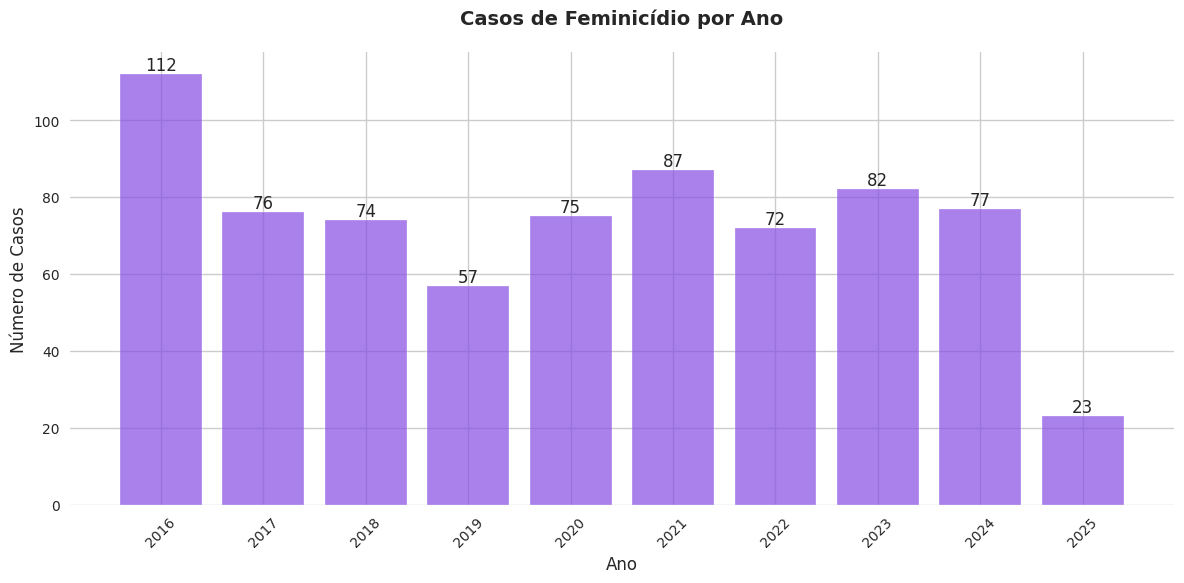


Estatísticas de Feminicídio:
Total de casos: 735
Ano com mais casos: 2016 (112 casos)

Distribuição por ano:
ANO
2016    112
2017     76
2018     74
2019     57
2020     75
2021     87
2022     72
2023     82
2024     77
2025     23
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

pefem.columns = pefem.columns.str.strip()

##Filtrar apenas casos de feminicidio da database de MVI
feminicidios = pefem[pefem['NATUREZA JURIDICA'].str.contains('FEMINICIDIO', case=False, na=False)]

##Verificação se há esse tipo de dados na database
if feminicidios.empty:
    print("Nenhum caso de feminicídio encontrado na base de dados.")
else:
##EXTRAÇÃO DA VARIÁVEL DATA
    if 'DATA' in pe.columns:
        feminicidios['DATA'] = pd.to_datetime(feminicidios['DATA'], errors='coerce')
        feminicidios['ANO'] = feminicidios['DATA'].dt.year

##AGRUPAMENTO POR ANO
    if 'ANO' in feminicidios.columns:
        casos_por_ano = feminicidios['ANO'].value_counts().sort_index()

##CRIAÇÃO DO GRÁFICO DE BARRAS
        plt.bar(casos_por_ano.index, casos_por_ano.values, color='#864ce2', alpha=0.7)

        plt.title('Casos de Feminicídio por Ano', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Ano', fontsize=12)
        plt.ylabel('Número de Casos', fontsize=12)
        plt.xticks(casos_por_ano.index, rotation=45)

        ##Addicionando números de casos na barra
        for ano, valor in zip(casos_por_ano.index, casos_por_ano.values):
            plt.text(ano, valor, str(valor), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        ##Tabela por ano
        print("\nEstatísticas de Feminicídio:")
        print(f"Total de casos: {len(feminicidios)}")
        print(f"Ano com mais casos: {casos_por_ano.idxmax()} ({casos_por_ano.max()} casos)")
        print("\nDistribuição por ano:")
        print(casos_por_ano)
    else:
        print("Não foi possível criar análise temporal (coluna DATA/ANO não disponível)")
        print(f"Total de casos de feminicídio encontrados: {len(feminicidios)}")

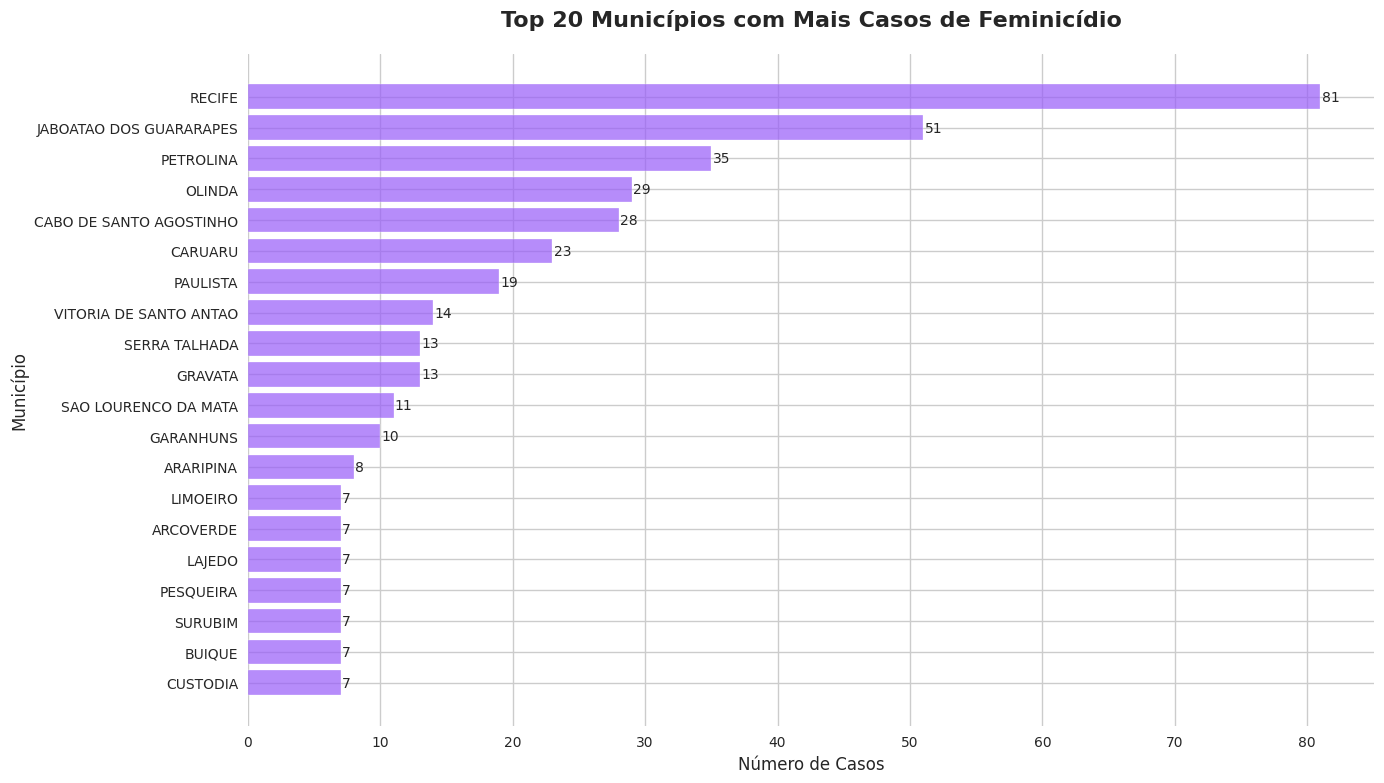


Estatísticas Gerais:
Total de municípios com casos: 154
Município com mais casos: RECIFE (81 casos)
Média de casos por município: 4.8


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

##Filtro da variavel feminicidio
feminicidios = pefem[pefem['NATUREZA JURIDICA'].str.contains('FEMINICIDIO', case=False, na=False)]

if feminicidios.empty:
    print("Nenhum caso de feminicídio encontrado na base de dados.")
else:
    ##Frequência de casos por município
    casos_por_municipio = feminicidios['MUNICIPIO'].value_counts().reset_index()
    casos_por_municipio.columns = ['MUNICIPIO', 'CASOS']

    top_municipios = casos_por_municipio.head(20)

    ##Gráficos de barras horizontais
    plt.barh(top_municipios['MUNICIPIO'], top_municipios['CASOS'], color='#985cf9', alpha=0.7)

    ##Titulo, legendas dos eixos
    plt.title('Top 20 Municípios com Mais Casos de Feminicídio',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Número de Casos', fontsize=12)
    plt.ylabel('Município', fontsize=12)

    ##inserção de valores na barra
    for i, valor in enumerate(top_municipios['CASOS']):
        plt.text(valor + 0.1, i, str(valor), va='center', fontsize=10)

    plt.gca().invert_yaxis()  # Município com mais casos no topo
    plt.tight_layout()
    plt.show()

    ##Tabela adicional
    print("\nEstatísticas Gerais:")
    print(f"Total de municípios com casos: {len(casos_por_municipio)}")
    print(f"Município com mais casos: {casos_por_municipio.iloc[0]['MUNICIPIO']} ({casos_por_municipio.iloc[0]['CASOS']} casos)")
    print(f"Média de casos por município: {casos_por_municipio['CASOS'].mean():.1f}")

In [ ]:
import pandas as pd
import requests

## API IBGE
url = "https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv"
df = pd.read_csv(url)

## Filtro dos municipios de pernqambuco
pe_coords = df[df['codigo_uf'] == 26][['codigo_ibge', 'nome', 'latitude', 'longitude']]
pe_coords.columns = ['codigo_ibge', 'municipio', 'latitude', 'longitude']

pe_coords.to_csv('coordenadas_municipios_pe.csv', index=False, encoding='utf-8-sig')
print(f"Dados de {len(pe_coords)} municípios salvos com sucesso!")

Dados de 185 municípios salvos com sucesso!


In [ ]:
##Criação de um mapa com os casos de feminicidio

import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import branca.colormap as cm

##Carregando PEFEM e feminicidios
feminicidios = pefem[pefem['NATUREZA JURIDICA'].str.contains('FEMINICIDIO', case=False, na=False)].copy()

#Carregando coordenadas
coordenadas_df = pd.read_csv('coordenadas_municipios_pe.csv')

##Padronização dos nomes dos municipios para não ocorrer erro no cross de dfs
def padronizar_nome(texto):
    return (texto.str.upper()
                .str.normalize('NFKD')
                .str.encode('ascii', errors='ignore')
                .str.decode('utf-8')
                .str.strip())

feminicidios['MUNICIPIO_PADRAO'] = padronizar_nome(feminicidios['MUNICIPIO'])
coordenadas_df['municipio_padrao'] = padronizar_nome(coordenadas_df['municipio'])

##Combinação de dfs
feminicidios = feminicidios.merge(
    coordenadas_df,
    left_on='MUNICIPIO_PADRAO',
    right_on='municipio_padrao',
    how='left'
)

##Criação do mapa interativo
mapa_center = [-8.05, -37.5]  # Coordenadas aproximadas do centro de PE
mapa = folium.Map(location=mapa_center, zoom_start=7, tiles='cartodbpositron')

casos_municipio = feminicidios.groupby(['municipio', 'latitude', 'longitude']).size().reset_index(name='total_casos')

##Configuração mapa
max_casos = casos_municipio['total_casos'].max()
colormap = cm.LinearColormap(
    colors=['#ffeda0', '#feb24c', '#f03b20'],
    vmin=0,
    vmax=max_casos
)
colormap.caption = 'Número de Casos de Feminicídio'
mapa.add_child(colormap)

##Marcadores agrupados para mapa interativo - menos zoom
marker_cluster = MarkerCluster(
    name="Casos por Município",
    overlay=True,
    control=True
).add_to(mapa)

for idx, row in casos_municipio.dropna().iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5 + (row['total_casos'] * 0.5),  # Tamanho proporcional
        popup=f"{row['municipio']}<br>Casos: {row['total_casos']}",
        color=colormap(row['total_casos']),
        fill=True,
        fill_color=colormap(row['total_casos']),
        fill_opacity=0.7,
        weight=1
    ).add_to(marker_cluster)

##mapa de calor
heat_data = [[row['latitude'], row['longitude'], row['total_casos']]
             for idx, row in casos_municipio.dropna().iterrows()]
HeatMap(
    heat_data,
    name='Heatmap',
    radius=20,
    blur=15,
    overlay=True,
    control=True
).add_to(mapa)


folium.LayerControl().add_to(mapa)

title_html = '''
    <h3 align="center" style="font-size:16px">
        <b>Distribuição Geográfica de Feminicídios em Pernambuco</b>
    </h3>
'''
mapa.get_root().html.add_child(folium.Element(title_html))

display(mapa)
mapa.save('feminicidios_pe_interativo.html')

# TENTATIVAS DE MODELOS DE PREDIÇÃO

Devido ao número de subnotificação tentamos utilizad modelos preditivos (random forest) para ajudar a predição de tipos de caso.

Infelizmente o modelo abaixo se mostrou falho e com baixa acurácia do modelo 1 (0.20), e permaneceu com baixa acurácia mesmo com a tentativa de balanceamento do banco de dados (0.16).

Isso pode ocorrer devido ao grande número de casos de um determinado tipos de crimes (ameaça) e menores de outros tipos (calúnia, constrangimento e cárcere). Ou seja, o desbalanceamento do banco é um problema.

Há a necessidade de elencar melhores modelos preditivos que levem em conta o desbalanceamento dos eventos sociais.

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample

def preprocess_data(df):
    ##conversão de variáveis
    for col in df.select_dtypes(include=['datetime', 'datetime64']).columns:
        df[col] = (df[col] - df[col].min()).dt.days


    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)

    ## conversão numericas e float
    for col in df.select_dtypes(include=['int', 'int64']).columns:
        df[col] = df[col].astype(float)

    return df

## pre processamento
df = preprocess_data(pe.copy())

## separação da coluna natureza
X = df.drop('NATUREZA', axis=1)
y = df['NATUREZA']

print("Tipos de dados nas features:")
print(X.dtypes)

X = pd.get_dummies(X)

## divisão em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## treinamento de modelo random forest
try:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    ##avaliação de modelo random forest
    print("\nDesempenho do modelo:")
    print(classification_report(y_test, model.predict(X_test)))

except Exception as e:
    print(f"Erro durante o treinamento: {str(e)}")
    print("\nSugestão: Verifique se todas as colunas são numéricas após o pré-processamento.")
    print("Colunas problemáticas podem ser:")
    print(X_train.select_dtypes(include=['object', 'category']).columns)

Tipos de dados nas features:
MUNICÍPIO DO FATO       object
REGIAO GEOGRÁFICA       object
DATA DO FATO           float64
ANO                    float64
SEXO                    object
IDADE SENASP            object
TOTAL DE ENVOLVIDOS    float64
MUNICIPIO_PADRAO        object
dtype: object

Desempenho do modelo:
                        precision    recall  f1-score   support

                AMEAÇA       0.32      0.33      0.33     40573
               CALÚNIA       0.00      0.00      0.00       653
CONSTRANGIMENTO ILEGAL       0.01      0.00      0.01       409
       CÁRCERE PRIVADO       0.01      0.01      0.01       129
                  DANO       0.03      0.02      0.02      5975
             DIFAMAÇÃO       0.01      0.01      0.01      2803
               ESTUPRO       0.01      0.01      0.01       452
 ESTUPRO DE VULNERÁVEL       0.22      0.21      0.21      1306
               INJÚRIA       0.09      0.09      0.09     15334
        LESÃO CORPORAL       0.22      0.21  

A tentativa de predição para os 60% dos casos não denúnciado se apresentou como baixa.

Tanto a precisão do modelo geral (Acurácia de 0.20) como a precisão e desempenho por classe aparecem como baixo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

df = pe.copy()

print("Valores nulos por coluna:")
print(df.isnull().sum())

le = LabelEncoder()
y = le.fit_transform(df['NATUREZA'])

X = df.drop('NATUREZA', axis=1)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
date_cols = X.select_dtypes(include=['datetime']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()
        ), num_cols),
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(handle_unknown='ignore')
        ), cat_cols),
        ('date', FunctionTransformer(
            lambda x: x.apply(pd.to_numeric, errors='coerce')
        ), date_cols)
    ],
    remainder='drop'
)

model = make_pipeline(
    preprocessor,
    RandomOverSampler(random_state=42),
    XGBClassifier(
        objective='multi:softmax',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1,
        enable_categorical=True
    )
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

try:
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    print("\nRelatório de Classificação:")
    print(classification_report(
        y_test,
        y_pred,
        target_names=le.classes_
    ))


    if hasattr(model.named_steps['xgbclassifier'], 'feature_importances_'):
        print("\nImportância das Features:")
        importances = model.named_steps['xgbclassifier'].feature_importances_
        features = []
        for name, pipe, cols in preprocessor.transformers:
            if name == 'cat' and hasattr(pipe.named_steps['onehotencoder'], 'get_feature_names_out'):
                cats = pipe.named_steps['onehotencoder'].get_feature_names_out(cols)
                features.extend(cats)
            elif name in ['num', 'date']:
                features.extend(cols)
        print(pd.Series(importances, index=features).sort_values(ascending=False).head(10))

except Exception as e:
    print(f"\nErro durante o treinamento: {str(e)}")
    print("\nSolução alternativa:")


    model = make_pipeline(
        preprocessor,
        RandomOverSampler(random_state=42),
        RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'
        )
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=le.classes_))

Valores nulos por coluna:
MUNICÍPIO DO FATO      0
REGIAO GEOGRÁFICA      0
NATUREZA               0
DATA DO FATO           0
ANO                    0
SEXO                   0
IDADE SENASP           0
TOTAL DE ENVOLVIDOS    0
MUNICIPIO_PADRAO       0
dtype: int64

Relatório de Classificação:
                        precision    recall  f1-score   support

                AMEAÇA       0.54      0.13      0.22     40573
               CALÚNIA       0.02      0.11      0.03       653
CONSTRANGIMENTO ILEGAL       0.02      0.25      0.03       409
       CÁRCERE PRIVADO       0.00      0.16      0.01       129
                  DANO       0.08      0.07      0.08      5975
             DIFAMAÇÃO       0.06      0.14      0.08      2803
               ESTUPRO       0.01      0.05      0.01       452
 ESTUPRO DE VULNERÁVEL       0.16      0.71      0.27      1306
               INJÚRIA       0.27      0.23      0.24     15334
        LESÃO CORPORAL       0.35      0.13      0.19     26668
  

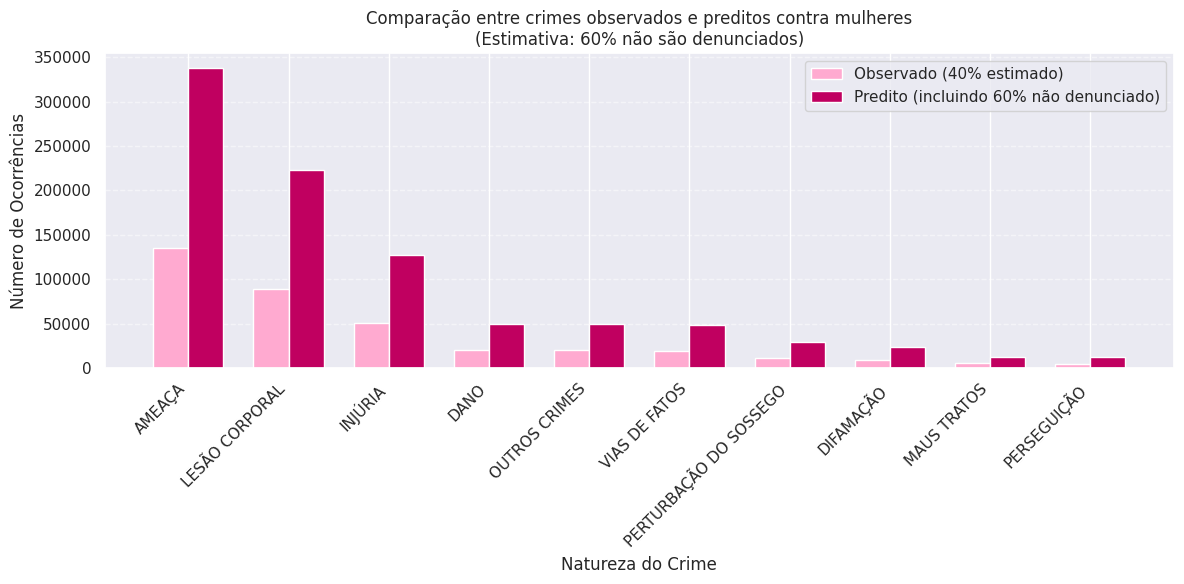

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'pe' seja seu DataFrame e 'NATUREZA' a coluna com os tipos de crime
# 1. Calcular a frequência observada
frequencia_observada = pe['NATUREZA'].value_counts().sort_values(ascending=False)

# 2. Ajustar para a predição (considerando que o observado é 40% do real)
frequencia_predita = frequencia_observada / 0.4

# Pegar o top 10 (ou ajuste conforme necessário)
top_10_observado = frequencia_observada.head(10)
top_10_predito = frequencia_predita.head(10)

# Configurar o gráfico
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(top_10_observado))

# Barras para valores observados
plt.bar(indices, top_10_observado, width=bar_width,
        color='#ffaad0', label='Observado (40% estimado)')

# Barras para valores preditos
plt.bar(indices + bar_width, top_10_predito, width=bar_width,
        color='#c00060', label='Predito (incluindo 60% não denunciado)')

# Ajustes estéticos
plt.title('Comparação entre crimes observados e preditos contra mulheres\n(Estimativa: 60% não são denunciados)')
plt.xlabel('Natureza do Crime')
plt.ylabel('Número de Ocorrências')
plt.xticks(indices + bar_width/2, top_10_observado.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

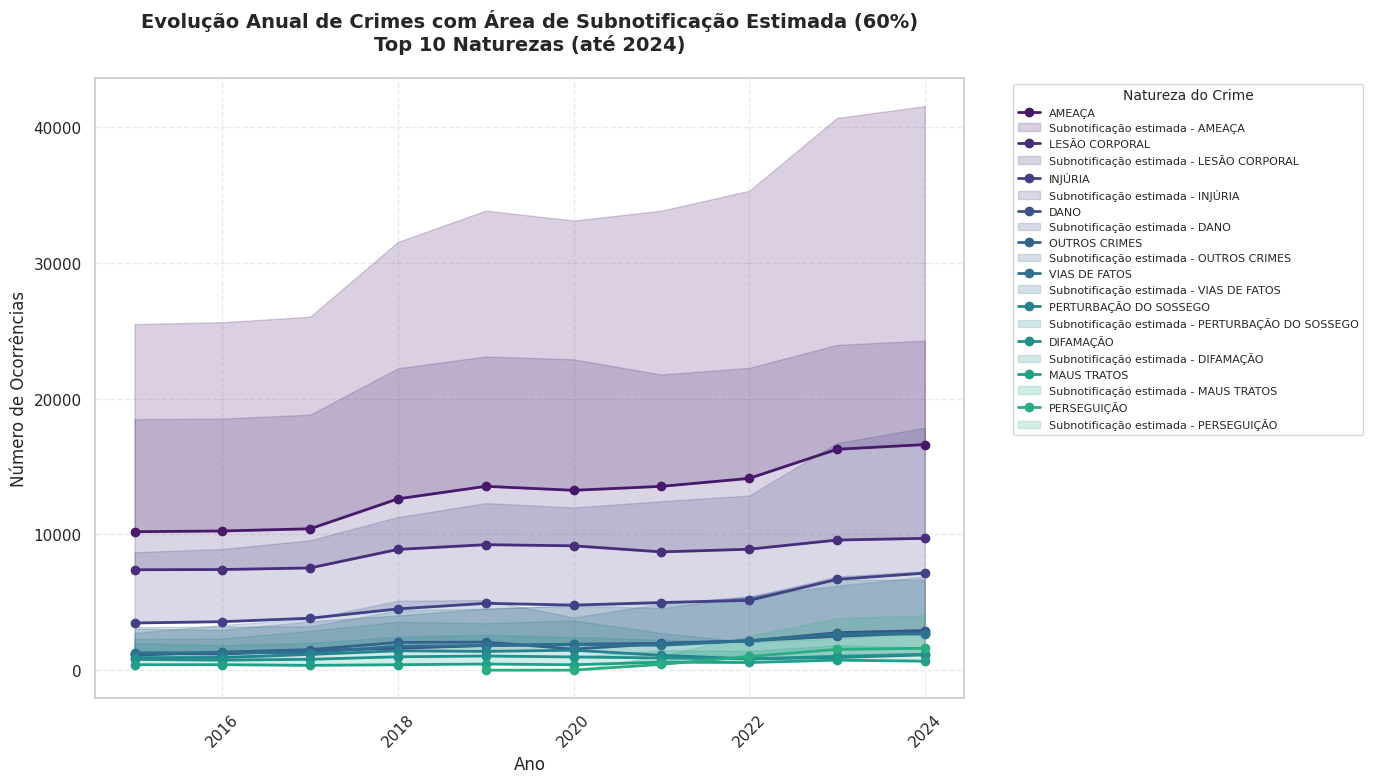


Tabela Resumo (Top 10 categorias):
                        Observado   Predito  Subnotificação (estimada)
NATUREZA                                                              
AMEAÇA                     130874  327185.0                   196311.0
LESÃO CORPORAL              86581  216452.0                   129872.0
INJÚRIA                     49074  122685.0                    73611.0
DANO                        18991   47478.0                    28486.0
OUTROS CRIMES               18981   47452.0                    28472.0
VIAS DE FATOS               18654   46635.0                    27981.0
PERTURBAÇÃO DO SOSSEGO      11269   28172.0                    16904.0
DIFAMAÇÃO                    9236   23090.0                    13854.0
MAUS TRATOS                  4960   12400.0                     7440.0
PERSEGUIÇÃO                  4578   11445.0                     6867.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuração do estilo
try:
    sns.set_style("whitegrid")
    palette = sns.color_palette("viridis", len(pe['NATUREZA'].unique()))
except:
    palette = sns.color_palette("tab20", len(pe['NATUREZA'].unique()))

# Limpeza da coluna
pe.columns = pe.columns.str.strip()

if 'DATA' in pe.columns:
    pe['DATA'] = pd.to_datetime(pe['DATA'], errors='coerce')
    pe['ANO'] = pe['DATA'].dt.year

# Filtrar dados
dados = pe[pe['ANO'] < 2025]

if dados.empty:
    print("Nenhum dado disponível antes de 2025.")
else:
    plt.figure(figsize=(14, 8))

    # Ordenar por natureza mais frequente
    naturezas_ordenadas = dados['NATUREZA'].value_counts().index

    for i, natureza in enumerate(naturezas_ordenadas[:10]):  # Limitando a top 10 para melhor visualização
        dados_natureza = dados[dados['NATUREZA'] == natureza]
        contagem = dados_natureza.groupby('ANO').size()
        contagem_predita = contagem / 0.4

        # Linha observada
        line, = plt.plot(contagem.index, contagem.values,
                        marker='o', linestyle='-',
                        label=natureza,
                        color=palette[i],
                        linewidth=2)

        # Área entre observado e predito
        plt.fill_between(contagem.index,
                         contagem.values,
                         contagem_predita.values,
                         color=palette[i],
                         alpha=0.2,
                         label=f'Subnotificação estimada - {natureza}')

    # Configurações do gráfico
    plt.title('Evolução Anual de Crimes com Área de Subnotificação Estimada (60%)\nTop 10 Naturezas (até 2024)',
             fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)

    # Legenda simplificada
    handles, labels = plt.gca().get_legend_handles_labels()
    # Pegar apenas um item de cada tipo para a legenda
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(),
              bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              title='Natureza do Crime',
              title_fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Tabela de resumo
    print("\nTabela Resumo (Top 10 categorias):")
    total_observado = dados['NATUREZA'].value_counts().head(10)
    total_predito = total_observado / 0.4

    df_resumo = pd.DataFrame({
        'Observado': total_observado,
        'Predito': total_predito.round(0),
        'Subnotificação (estimada)': (total_predito - total_observado).round(0)
    })
    print(df_resumo)